In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sys
sys.path.append('/Users/lee_jollans/PycharmProjects/mdd_clustering/')
sys.path.append('/Users/lee_jollans/PycharmProjects/mdd_clustering/cv_clustering')
sys.path.append('/Users/lee_jollans/Projects/clustering_pilot/may2020_evaluation/')
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import pathlib
from scipy.cluster.hierarchy import dendrogram
from cv_clustering.mainfoldaggr import plot_dendrogram
from sklearn.manifold import TSNE
from cv_clustering.utils import colorscatter
from cv_clustering.beta_aggregate import vector_mse, get_proba
from sklearn.metrics import explained_variance_score, silhouette_score
import copy
from utils_for_ipynb_050520 import varexpmatcher, mainfold_clus_comp, assigfromproba, prob_from_data
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

In [2]:
#MDD
sets = ["Tc", "Sc", "TSc", "Tc_tc", "Sc_sc", "TSc_tsc", "Tct_s", "Scs_s", "Tct_Scs_s", "Tct_tc_s", "Scs_sc_s", "Tct_Scs_tc_sc_s"]
setsize=np.array([82,82,150,84,84,154,82,82,150,84,84,154])
n_cv_folds = 4
n_k = 8

input_filedir = '/Users/lee_jollans/Projects/clustering_pilot/FEB_PUT/FEB_'
modstr = '_mod_ctrl_'
input_filedirn = '/Users/lee_jollans/Projects/clustering_pilot/null/MDDnull/MDD__'
modstrn = '_mod_null_'

input_filediri = '/Users/lee_jollans/Projects/clustering_pilot/IXI2/act/IXI2_'
modstri = '_mod_'
input_filedirin = '/Users/lee_jollans/Projects/clustering_pilot/IXI2/null2/IXI2_'
modstrin = '_mod_null_'

In [3]:
##################
#    LEVEL 1     #
##################

with open(input_filedir + modstr + 'sil_pac_lvl1.pkl', 'rb') as f:
    [silhouette_lvl1,pac_lvl1,clussize_lvl1]=pickle.load(f)

with open(input_filedirn + modstrn + 'sil_pac_lvl1.pkl', 'rb') as f:
    [silhouette_lvl1n,pac_lvl1n,clussize_lvl1n]=pickle.load(f)
    
with open(input_filediri + modstri + 'sil_pac_lvl1.pkl', 'rb') as f:
    [silhouette_lvl1i,pac_lvl1i,clussize_lvl1i]=pickle.load(f)

with open(input_filedirin + modstrin + 'sil_pac_lvl1.pkl', 'rb') as f:
    [silhouette_lvl1in,pac_lvl1in,clussize_lvl1in]=pickle.load(f)
    
##################
#    LEVEL 2     #
##################

with open(input_filedir + modstr + 'sil_f1_prob_lvl2.pkl', 'rb') as f:
    [silhouette1_lvl2,silhouette2_lvl2,microf1_lvl2,macrof1_lvl2,testproba_lvl2,clussize_CE_lvl2,clussize_test_lvl2]=pickle.load(f)

with open(input_filedirn + modstrn + 'sil_f1_prob_lvl2.pkl', 'rb') as f:
    [silhouette1_lvl2n,silhouette2_lvl2n,microf1_lvl2n,macrof1_lvl2n,testproba_lvl2n,clussize_CE_lvl2n,clussize_test_lvl2n]=pickle.load(f)

with open(input_filediri + modstri + 'sil_f1_prob_lvl2.pkl', 'rb') as f:
    [silhouette1_lvl2i,silhouette2_lvl2i,microf1_lvl2i,macrof1_lvl2i,testproba_lvl2i,clussize_CE_lvl2i,clussize_test_lvl2i]=pickle.load(f)

with open(input_filedirin + modstrn + 'sil_f1_prob_lvl2.pkl', 'rb') as f:
    [silhouette1_lvl2in,silhouette2_lvl2in,microf1_lvl2in,macrof1_lvl2in,testproba_lvl2in,clussize_CE_lvl2in,clussize_test_lvl2in]=pickle.load(f)

with open((input_filedir + 'nclus_agglom.pkl'), 'rb') as f:
    nclus_aglom = np.array(pickle.load(f)[0])
with open((input_filedirn + 'nclus_agglom.pkl'), 'rb') as f:
    nclus_aglomn = np.array(pickle.load(f)[0])
with open((input_filediri + 'nclus_agglom.pkl'), 'rb') as f:
    nclus_aglomi = np.array(pickle.load(f)[0])
with open((input_filedirin + 'nclus_agglom.pkl'), 'rb') as f:
    nclus_aglomin = np.array(pickle.load(f)[0])
    

    
##################
#    dataframe   #
##################

df = pd.DataFrame({}, columns=['set', 'data', 'null', 'silhouette_lvl1','silhouette1_lvl2','silhouette2_lvl2', 'pac_lvl1', 'naglom','k', 'mainfold', 'subfold'])

for s in range(len(sets)):
    for k in range(8):
        for mf in range(4):
            for sf in range(4):
                tmp_df = pd.DataFrame({'set': sets[s], 
                                       'data': 'mdd',
                                       'null': 0,
                                       'silhouette_lvl1': [np.nanmean(silhouette_lvl1[s,mf,sf,:,k])],
                                       'silhouette1_lvl2': [silhouette1_lvl2[s,mf,sf,k]],
                                       'silhouette2_lvl2': [silhouette2_lvl2[s,mf,sf,k]],
                                       'pac_lvl1': [pac_lvl1[s,mf,sf,k]],
                                       'naglom':[nclus_aglom[s,mf,sf,k]],
                                       'k': k+2,
                                       'mainfold': mf,
                                       'subfold': sf})
                df = df.append(tmp_df)    
                tmp_df = pd.DataFrame({'set': sets[s], 
                                       'data': 'mdd_null',
                                        'null': 1,
                                       'silhouette_lvl1': [np.nanmean(silhouette_lvl1n[s,mf,sf,:,k])],
                                       'silhouette1_lvl2': [silhouette1_lvl2n[s,mf,sf,k]],
                                       'silhouette2_lvl2': [silhouette2_lvl2n[s,mf,sf,k]],
                                       'pac_lvl1': [pac_lvl1n[s,mf,sf,k]],
                                       'naglom':[nclus_aglomn[s,mf,sf,k]],
                                       'k': k+2,
                                       'mainfold': mf,
                                       'subfold': sf})
                df = df.append(tmp_df)    
                tmp_df = pd.DataFrame({'set': sets[s], 
                                       'data': 'ixi',
                                        'null': 0,
                                       'silhouette_lvl1': [np.nanmean(silhouette_lvl1i[s,mf,sf,:,k])],
                                       'silhouette1_lvl2': [silhouette1_lvl2i[s,mf,sf,k]],
                                       'silhouette2_lvl2': [silhouette2_lvl2i[s,mf,sf,k]],
                                       'pac_lvl1': [pac_lvl1i[s,mf,sf,k]],
                                       'naglom':[nclus_aglomi[s,mf,sf,k]],
                                       'k': k+2,
                                       'mainfold': mf,
                                       'subfold': sf})
                df = df.append(tmp_df)    
                tmp_df = pd.DataFrame({'set': sets[s], 
                                       'data': 'ixi_null',
                                        'null': 1,
                                       'silhouette_lvl1': [np.nanmean(silhouette_lvl1in[s,mf,sf,:,k])],
                                       'silhouette1_lvl2': [silhouette1_lvl2in[s,mf,sf,k]],
                                       'silhouette2_lvl2': [silhouette2_lvl2in[s,mf,sf,k]],
                                       'pac_lvl1': [pac_lvl1in[s,mf,sf,k]],
                                       'naglom':[nclus_aglomin[s,mf,sf,k]],
                                       'k': k+2,
                                       'mainfold': mf,
                                       'subfold': sf})
                df = df.append(tmp_df)    
                

df12=df

Tc


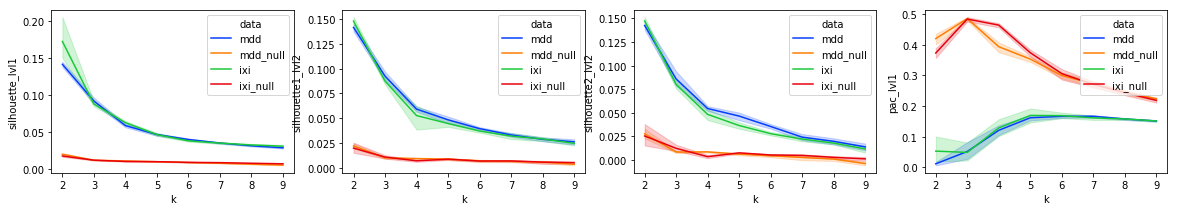

Sc


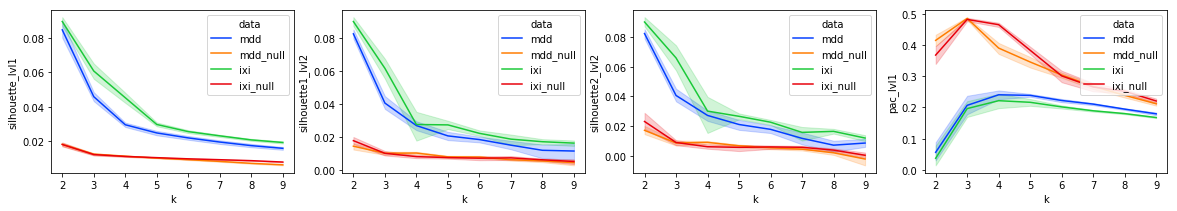

TSc


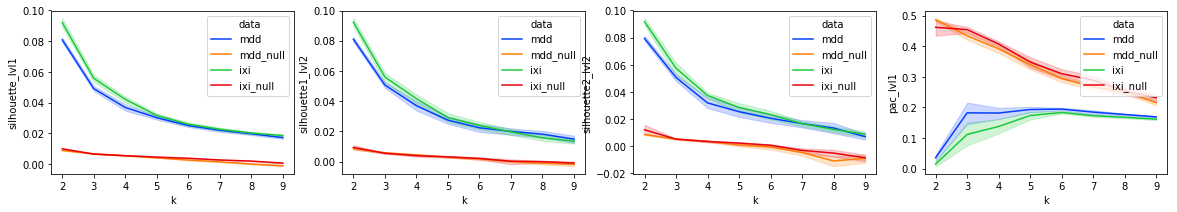

Tct_s


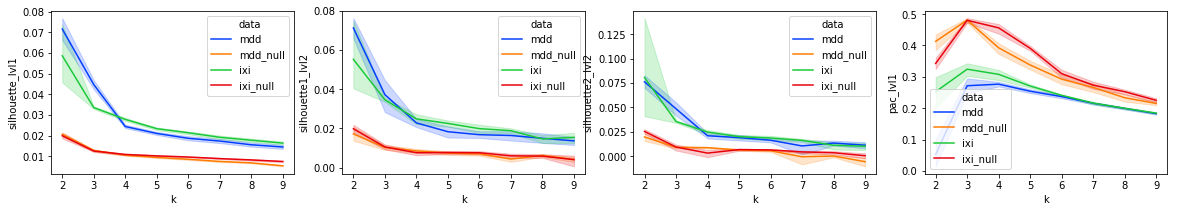

Scs_s


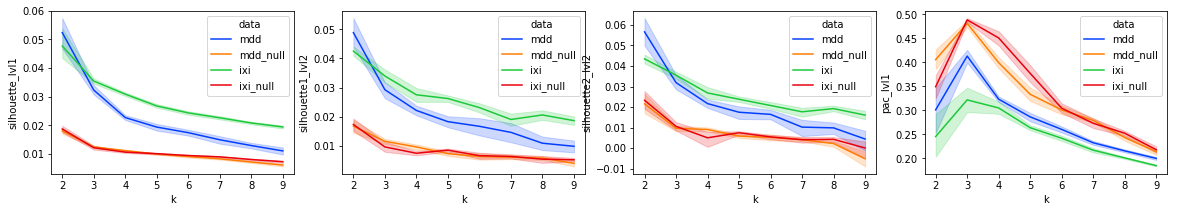

Tct_Scs_s


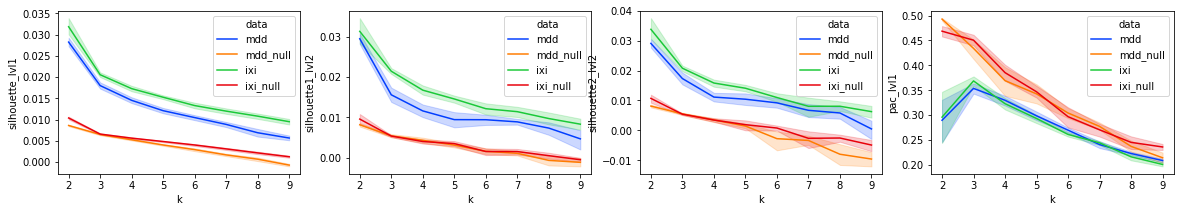

In [138]:
for s in [0,1,2,6,7,8]:
    print(sets[s])
    fig = plt.figure(figsize=[20,3])
    df2=df[df['set']==sets[s]]
    plt.subplot(1,4,1)
    sns.lineplot(y='silhouette_lvl1',x='k',hue='data',data=df2, palette='bright')
    plt.subplot(1,4,2)
    sns.lineplot(y='silhouette1_lvl2',x='k',hue='data',data=df2, palette='bright')
    plt.subplot(1,4,3)
    sns.lineplot(y='silhouette2_lvl2',x='k',hue='data',data=df2, palette='bright')
    plt.subplot(1,4,4)
    sns.lineplot(y='pac_lvl1',x='k',hue='data',data=df2, palette='bright')
    plt.show()

Tc
[0. 0. 0. 0.]
[0. 0. 0. 0.]
[0. 0. 0. 0.]
[0. 0. 1. 0.]


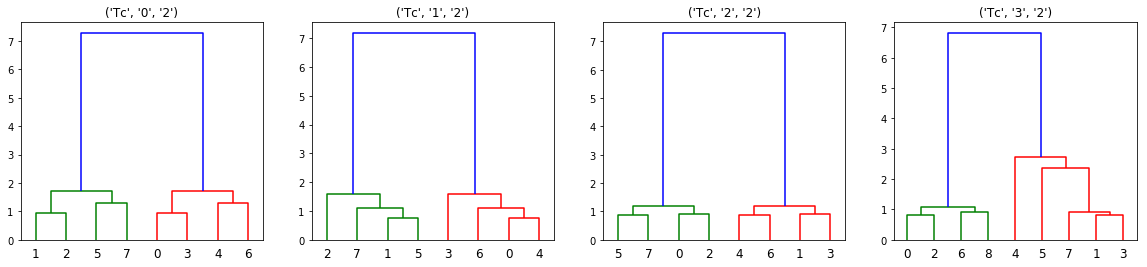

Sc
[0. 0. 0. 0.]
[0. 0. 0. 0.]
[0. 0. 0. 0.]
[0. 0. 0. 0.]


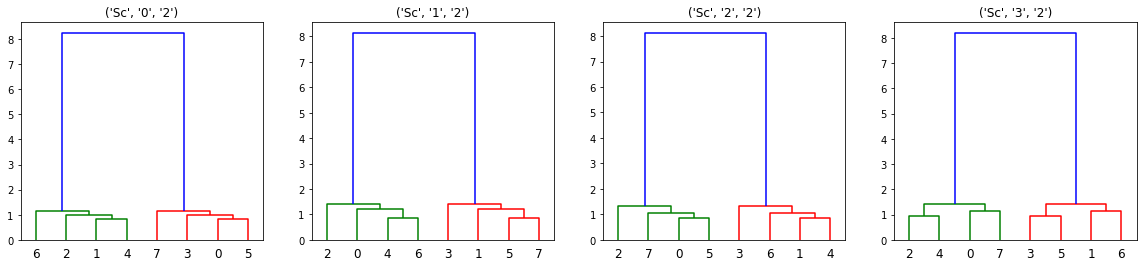

TSc
[0. 0. 0. 0.]
[0. 0. 0. 0.]
[0. 0. 0. 0.]
[0. 0. 0. 0.]


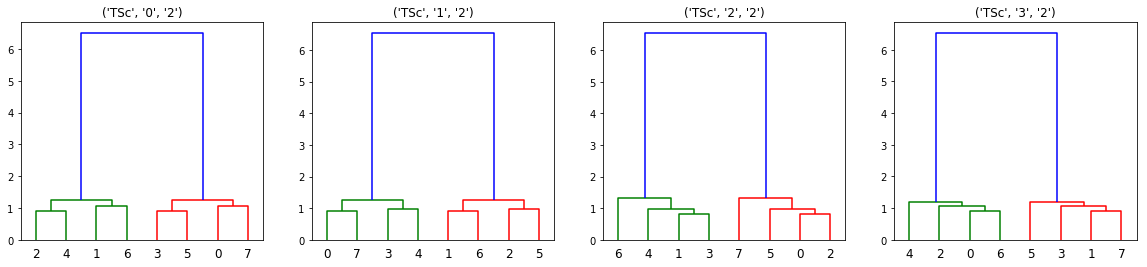

Tc_tc
[0. 0. 0. 0.]
[0. 0. 0. 0.]
[0. 0. 0. 0.]
[0. 0. 0. 0.]


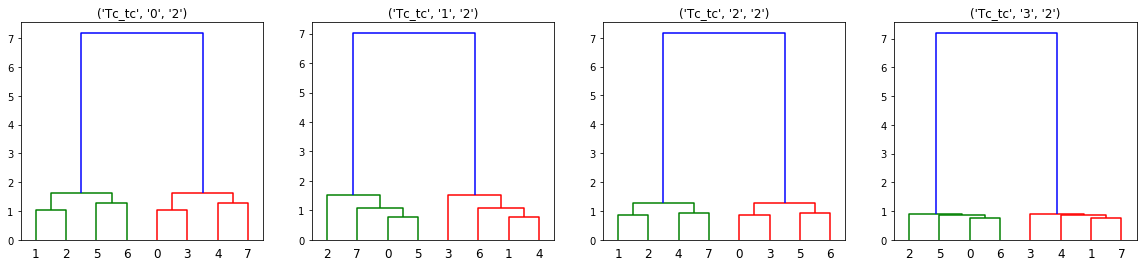

Sc_sc
[0. 0. 0. 0.]
[0. 0. 0. 0.]
[0. 0. 0. 0.]
[0. 0. 0. 0.]


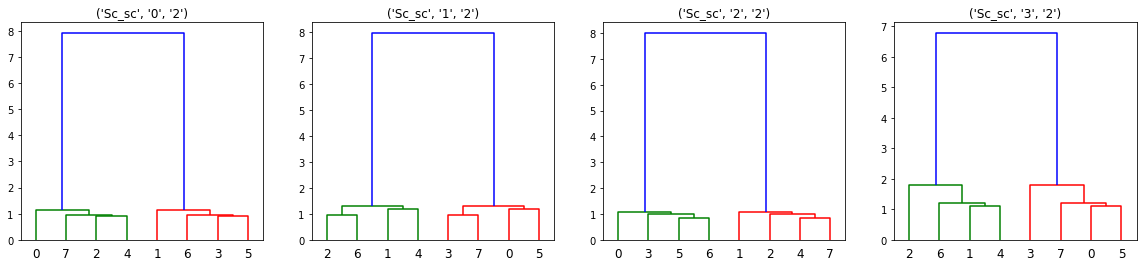

TSc_tsc
[0. 0. 0. 0.]
[0. 0. 0. 0.]
[0. 0. 0. 0.]
[0. 0. 0. 0.]


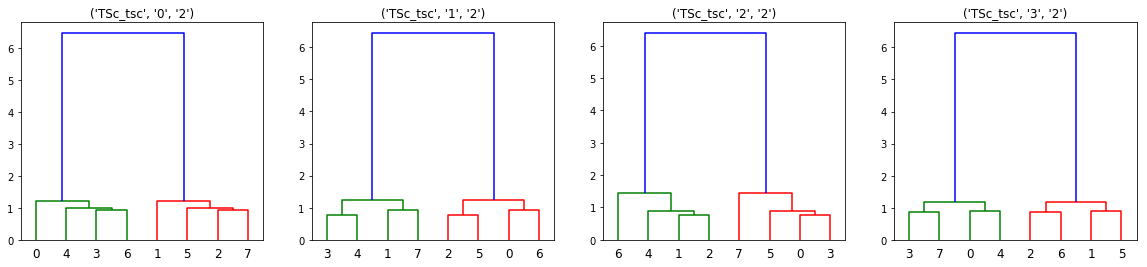

Tct_s
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 5. 0. 0.]
[0. 0. 1. 0.]


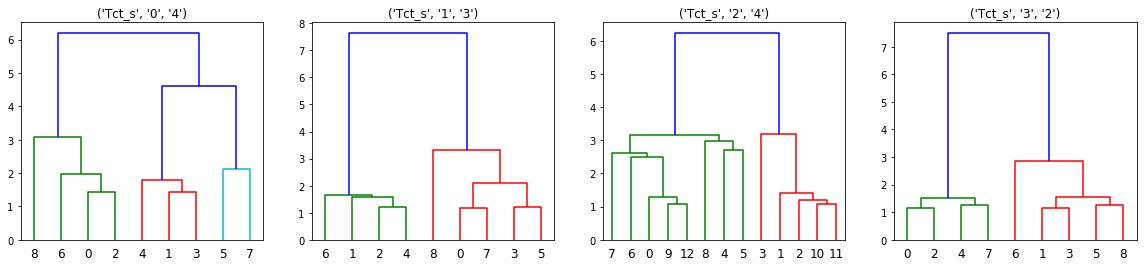

Scs_s
[7. 0. 0. 3.]
[0. 0. 0. 0.]
[0. 0. 1. 1.]
[0. 0. 0. 0.]


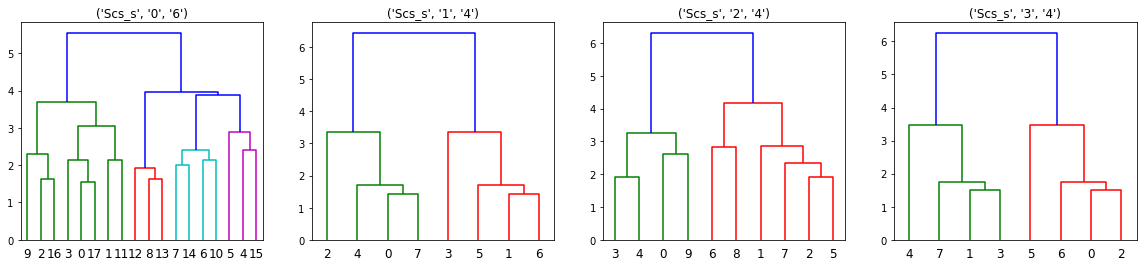

Tct_Scs_s
[0. 6. 0. 0.]
[4. 0. 0. 6.]
[0. 0. 0. 0.]
[7. 6. 6. 1.]


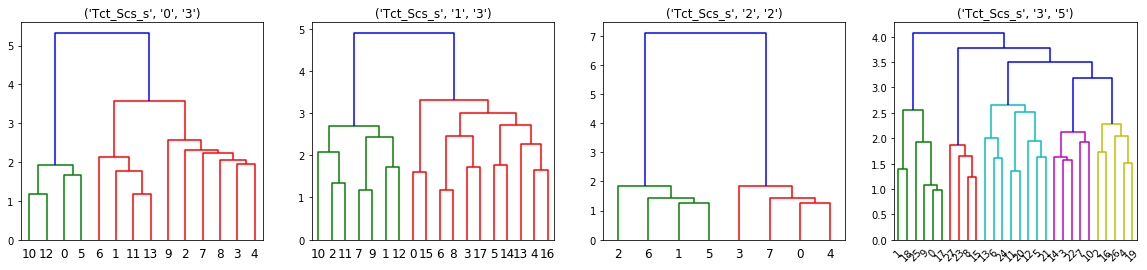

Tct_tc_s
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 0.]
[0. 0. 1. 0.]


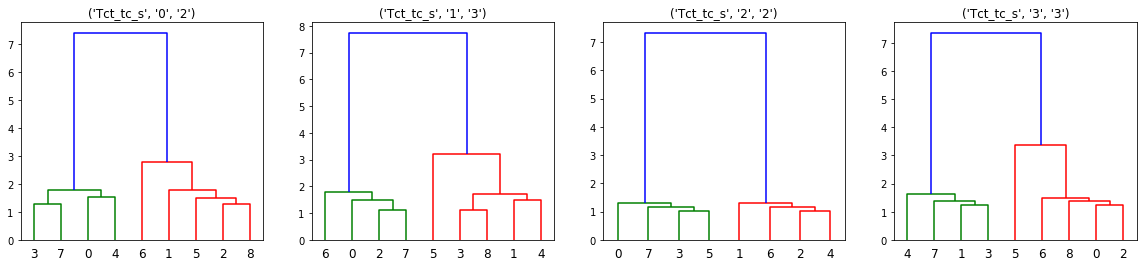

Scs_sc_s
[1. 0. 0. 0.]
[0. 0. 0. 0.]
[0. 0. 0. 0.]
[0. 0. 0. 1.]


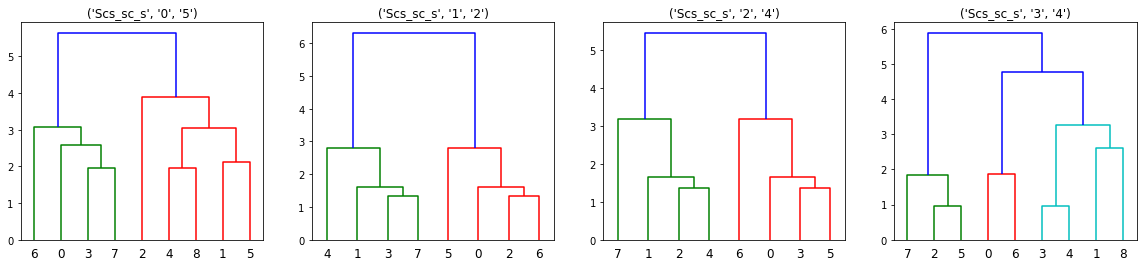

Tct_Scs_tc_sc_s
[7. 0. 0. 0.]
[0. 0. 0. 0.]
[0. 0. 6. 0.]
[0. 0. 0. 0.]


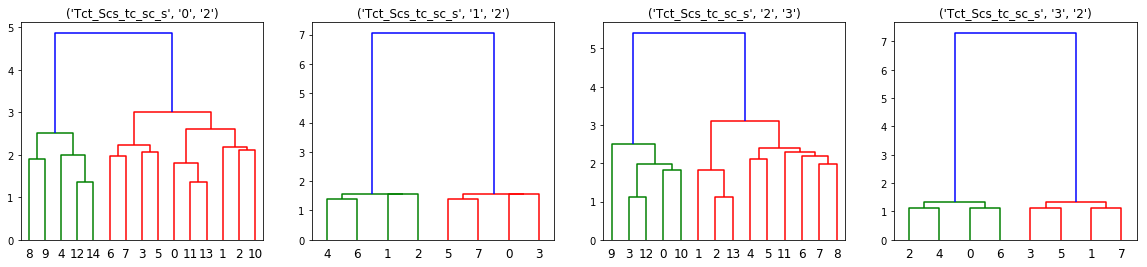

In [4]:
# get best k for each subfold based on difference from null for silhouette2_lvl2
bestk_mdd = np.full([12,4,4],np.nan)
allbetas_sfk=[None]*12
for s in range(12):
    allbetas_sfk[s]=[]
    print(sets[s])
    fig=plt.figure(figsize=[20,4])
    for mf in range(4):
        X=np.empty((setsize[s],0),int)
        for sf in range(4):
            
            fold=(mf*n_cv_folds)+sf
            filestr=(input_filedir + sets[s] + modstr + str(fold))
            with open(filestr, "rb") as f:
                mod = pickle.load(f)                    
                    
            act_crit=silhouette2_lvl2[s,mf,sf,:]
            null_crit=silhouette2_lvl2n[s,mf,sf,:]
            critd=act_crit-null_crit
            maxcrit=np.nanmax(critd)
            maxcritwhere=np.where(critd==maxcrit)[0]
            bestk_mdd[s,mf,sf]=maxcritwhere
            
            if bestk_mdd[s,mf,sf]==0:
                crit=np.nanmean(mod.allbetas[bestk_mdd[s,mf,sf].astype(int)],axis=1)
                crit=np.array([crit,-crit]).T
                criti=np.nanmean(mod.allitcpt[bestk_mdd[s,mf,sf].astype(int)])
                criti = np.array([criti, -criti]).T
            else:
                crit=np.nanmean(mod.allbetas[bestk_mdd[s,mf,sf].astype(int)],axis=2)
                criti=np.nanmean(mod.allitcpt[bestk_mdd[s,mf,sf].astype(int)],axis=1)

            X = np.append(X,crit, axis=1)
        print(bestk_mdd[s,mf,:])    
        clustering = AgglomerativeClustering(compute_full_tree=True, distance_threshold=3, n_clusters=None,linkage='ward').fit(X.T)
        nk=len(np.unique(clustering.labels_))
        assig=np.full([n_cv_folds,nk],np.nan)
        allbetas = np.full([X.shape[0], nk], np.nan)
        for cc in range(nk):
            allbetas[:, cc] = np.nanmean(X[:, np.where(clustering.labels_ == cc)[0]], axis=1)
        allbetas_sfk[s].append(allbetas)
        
        plt.subplot(1,4,mf+1)
        plot_dendrogram(clustering, p=3)
        plt.title((sets[s],str(mf), str(len(np.unique(clustering.labels_)))))
    plt.show() 

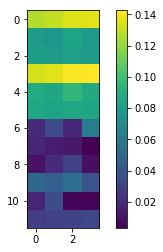

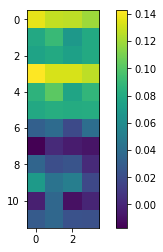

In [7]:
silmaintrain=np.full([12,4],np.nan)
silmaintest=np.full([12,4],np.nan)
for s in range(12):
    for mf in range(4):
        filestr=(input_filedir + sets[s] + modstr + str(0))
        with open(filestr, "rb") as f:
            mod = pickle.load(f)
            
        maintest = np.where(np.isnan(mod.cv_assignment[:, mf]))[0]
        maintrain = np.where(np.isfinite(mod.cv_assignment[:, mf]))[0]

        newY1 = mod.data[maintrain,:].dot(allbetas_sfk[s][mf])
        argmaxYtrain = np.array([np.where(newY1[i, :] == np.max(newY1[i, :]))[0][0] for i in range(newY1.shape[0])])
        tmp_trainproba, tmp_testproba = get_proba(mod.data[maintrain,:], argmaxYtrain, allbetas_sfk[s][mf], mod.data[maintest,:])
        assignment_train, likelihood_train, assignment10_train = assigfromproba(tmp_trainproba,4)
        assignment_test, likelihood_test, assignment10_test = assigfromproba(tmp_testproba,4)
        silmaintrain[s,mf]=silhouette_score(mod.data[maintrain,:], assignment_train)
        silmaintest[s,mf]=silhouette_score(mod.data[maintest,:], assignment_test)
plt.imshow(silmaintrain); plt.colorbar();plt.show()
plt.imshow(silmaintest); plt.colorbar();plt.show()

In [ ]:
# load one mod file for dataset sizes and data
for s in [0,3]:
    filestr=(input_filedir + sets[s] + modstr + str(0))
    with open(filestr, "rb") as f:
        mod = pickle.load(f)

In [ ]:
# load one mod file for dataset sizes and data
for s in [0,3]:
    filestr=(input_filedir + sets[s] + modstr + str(0))
    with open(filestr, "rb") as f:
        mod = pickle.load(f)
        
    # preallocate
    assignedwhere = np.full([4,2], np.nan)
    newlabel = np.zeros(shape=[mod.data.shape[0]])
    allcert = np.zeros(shape=[mod.data.shape[0]])
        
    # collect all betas and compare
    tmp=[]
    for mf in range(4):
        tmp.append(allbetas_sfk[s][mf])
    allmses, allcorrs, allvarexp = mainfold_clus_comp(tmp,0)
    allvarexp2=copy.copy(allvarexp)

    print('max variance explained:', np.nanmax(allvarexp))
    if np.nanmax(allvarexp)>minvarexp:
        
        fig=plt.figure(figsize=[20,10])
        #plt.subplot(2,2,2)
        #sns.distplot(allvarexp.flatten())
        #plt.title('variance explained between cluster vectors across CV folds')
        
        assignedwhere=varexpmatcher(allvarexp, k, minvarexp)
        trainlabels=np.full([mod.data.shape[0],4],np.nan)
        trainrelab = np.full([mod.data.shape[0],4],0)
        trainl = np.full([mod.data.shape[0]],0)
        trainlcert = np.full([mod.data.shape[0]],0)
        for mf in range(4):
            # get mainfold cluster probabilities
            maintest = np.where(np.isnan(mod.cv_assignment[:, mf]))[0]
            with open((input_filedir + sets[s] + '_aggr_betas_k' + str(k) + '_mf' + str(mf) + '.pkl'),'rb') as f:
                [X, clustering, assig, allbetas, tmp_testproba, argmaxYdot, argmaxYprob] = pickle.load(f)
            assignment_test, likelihood_test, assignment25_test = assigfromproba(tmp_testproba,2)
            maintrain = np.where(np.isfinite(mod.cv_assignment[:, mf]))[0]
            assignment_train, likelihood_train, assignment25_train = prob_from_data(mod.data[maintrain, :], allbetas, 2)

            # plot the mainfold test set assignments
            ax=plt.subplot(3,4,5+mf); colorscatter(Tc[maintest,:], assignment25_test, likelihood_test*7, ax, 1)
            
            # plot the mainfold train set assignments
            ax=plt.subplot(3,4,9+mf); colorscatter(Tc[maintrain,:], assignment25_train, likelihood_train*7, ax, 1)
            
            
            # fill the re-labeled assignments from the test sets into one vector
            for c in range(k+2):
                newlabel[maintest[np.where(assignment25_test==c+1)[0]]]=assignedwhere[mf,c]
                trainrelab[maintrain[np.where(assignment25_train==c+1)[0]],mf]=assignedwhere[mf,c]
            allcert[maintest]=likelihood_test
            
        for i in range(mod.data.shape[0]):
            ccount=np.array([len(np.where(trainrelab[i,:]==c)[0]) for c in range(k+3)])
            maxccount=np.nanmax(ccount)
            if len(np.where(ccount==2)[0])==1:
                trainl[i]=np.where(ccount==2)[0]
                trainlcert[i]=2
            elif maxccount>2:
                trainl[i]=np.where(ccount==maxccount)[0]
                trainlcert[i]=maxccount
            #elif:
            #    print(ccount)
            
        ax=plt.subplot(3,2,2)
        colorscatter(Tc,trainl,trainlcert+1,ax,1)            
            
        # plot all re-labeled test set assignments    
        newlabel[np.isnan(newlabel)]=0
        ax=plt.subplot(3,2,1)
        colorscatter(Tc,newlabel,allcert*7,ax,1)
        plt.show()

mdd


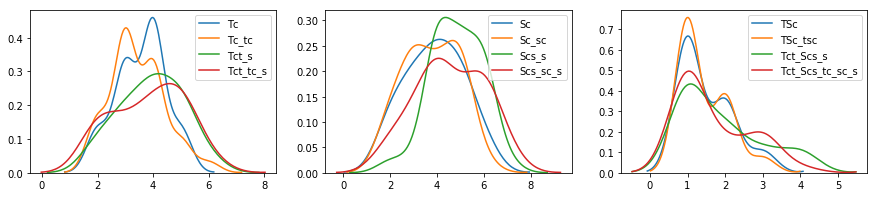

mdd_null


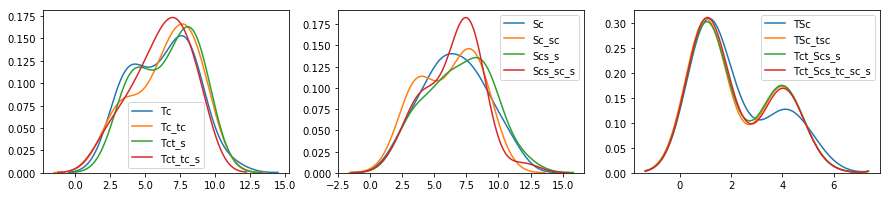

ixi


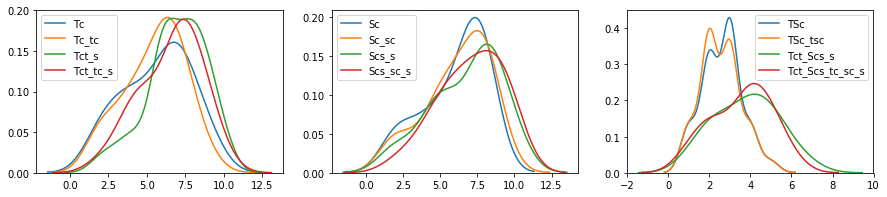

ixi_null


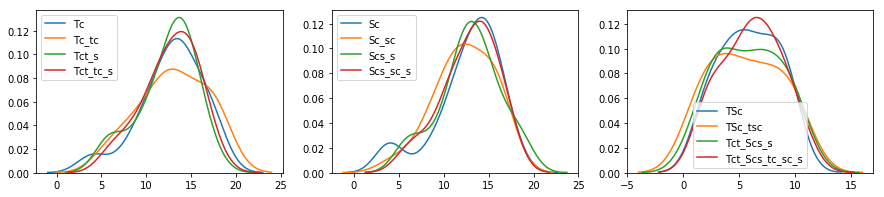

In [109]:
for d in ['mdd','mdd_null','ixi','ixi_null']:
    print(d)
    fig=plt.figure(figsize=[15,3])
    df2=df[df['data']==d]
    for mod in range(3):
        plt.subplot(1,3,mod+1)
        a=np.linspace(mod,9+mod,4).astype(int)
        for s in a:
            df3=df2[df2['set']==sets[s]]
            sns.kdeplot(df3['naglom'].to_numpy(), label=sets[s])
        #plt.xlim([0,10])
    plt.show()

In [41]:
##################
#    LEVEL 3     #
##################

with open(input_filedir + modstr + 'sil_prob_lvl3.pkl', 'rb') as f:
    [silhouette_dot_lvl3,silhouette_prob_lvl3,testproba_best_lvl3,testproba_best_perclus_lvl3,clussize_dot_lvl3,clussize_prob_lvl3]=pickle.load(f)
with open(input_filedirn + modstrn + 'sil_prob_lvl3.pkl', 'rb') as f:
    [silhouette_dot_lvl3n,silhouette_prob_lvl3n,testproba_best_lvl3n,testproba_best_perclus_lvl3n,clussize_dot_lvl3n,clussize_prob_lvl3n]=pickle.load(f)
with open(input_filediri + modstri + 'sil_prob_lvl3.pkl', 'rb') as f:
    [silhouette_dot_lvl3i,silhouette_prob_lvl3i,testproba_best_lvl3i,testproba_best_perclus_lvl3i,clussize_dot_lvl3i,clussize_prob_lvl3i]=pickle.load(f)
with open(input_filedirin + modstrin + 'sil_prob_lvl3.pkl', 'rb') as f:
    [silhouette_dot_lvl3in,silhouette_prob_lvl3in,testproba_best_lvl3in,testproba_best_perclus_lvl3in,clussize_dot_lvl3in,clussize_prob_lvl3in]=pickle.load(f)

    
with open(input_filedir + modstr + 'sil_prob_00_lvl3.pkl', 'rb') as f:
    [o_silhouette_dot_lvl3,o_silhouette_prob_lvl3,o_testproba_best_lvl3,o_testproba_best_perclus_lvl3,o_clussize_dot_lvl3,o_clussize_prob_lvl3]=pickle.load(f)
with open(input_filedirn + modstrn + 'sil_prob_00_lvl3.pkl', 'rb') as f:
    [o_silhouette_dot_lvl3n,o_silhouette_prob_lvl3n,o_testproba_best_lvl3n,o_testproba_best_perclus_lvl3n,o_clussize_dot_lvl3n,o_clussize_prob_lvl3n]=pickle.load(f)
with open(input_filediri + modstri + 'sil_prob_00_lvl3.pkl', 'rb') as f:
    [o_silhouette_dot_lvl3i,o_silhouette_prob_lvl3i,o_testproba_best_lvl3i,o_testproba_best_perclus_lvl3i,o_clussize_dot_lvl3i,o_clussize_prob_lvl3i]=pickle.load(f)
with open(input_filedirin + modstrin + 'sil_prob_00_lvl3.pkl', 'rb') as f:
    [o_silhouette_dot_lvl3in,o_silhouette_prob_lvl3in,o_testproba_best_lvl3in,o_testproba_best_perclus_lvl3in,o_clussize_dot_lvl3in,o_clussize_prob_lvl3in]=pickle.load(f)
    
    
    
    
##################
#    dataframe   #
##################

df3 = pd.DataFrame({}, columns=['set', 'data', 'null', 'silhouette_dot','silhouette1_prob','testprob','testprobclusmin','aggregation','clussizemax','clussizemin', 'k', 'mainfold'])

for s in range(len(sets)):
    for k in range(8):
        for mf in range(4):
            tmp_df = pd.DataFrame({'set': sets[s], 
                                   'data': 'mdd',
                                   'null': 0,
                                   'silhouette_dot': [silhouette_dot_lvl3[s,mf,k]],
                                   'silhouette_prob': [silhouette_prob_lvl3[s,mf,k]],
                                   'testprob': [testproba_best_lvl3[s,mf,k]],
                                   'testprobclusmin':[np.nanmean(testproba_best_perclus_lvl3[s,mf,k,:])],
                                   'aggregation':'hierarchical clustering',
                                   'clussizemax':np.nanmax(clussize_dot_lvl3[s,mf,k,:]),
                                   'clussizemin':np.nanmin(clussize_dot_lvl3[s,mf,k,:]),
                                   'k': k+2,
                                   'mainfold': mf})
            df3 = df3.append(tmp_df)    
            tmp_df = pd.DataFrame({'set': sets[s], 
                                   'data': 'mdd_null',
                                   'null': 1,
                                   'silhouette_dot': [silhouette_dot_lvl3n[s,mf,k]],
                                   'silhouette_prob': [silhouette_prob_lvl3n[s,mf,k]],
                                   'testprob': [testproba_best_lvl3n[s,mf,k]],
                                   'testprobclusmin':[np.nanmean(testproba_best_perclus_lvl3n[s,mf,k,:])],
                                   'aggregation':'hierarchical clustering',
                                   'clussizemax':np.nanmax(clussize_dot_lvl3n[s,mf,k,:]),
                                   'clussizemin':np.nanmin(clussize_dot_lvl3n[s,mf,k,:]),
                                   'k': k+2,
                                   'mainfold': mf})
            df3 = df3.append(tmp_df)    
            tmp_df = pd.DataFrame({'set': sets[s], 
                                   'data': 'ixi',
                                   'null': 0,
                                   'silhouette_dot': [silhouette_dot_lvl3i[s,mf,k]],
                                   'silhouette_prob': [silhouette_prob_lvl3i[s,mf,k]],
                                   'testprob': [testproba_best_lvl3i[s,mf,k]],
                                   'testprobclusmin':[np.nanmean(testproba_best_perclus_lvl3i[s,mf,k,:])],
                                   'aggregation':'hierarchical clustering',
                                   'clussizemax':np.nanmax(clussize_dot_lvl3i[s,mf,k,:]),
                                   'clussizemin':np.nanmin(clussize_dot_lvl3i[s,mf,k,:]),
                                   'k': k+2,
                                   'mainfold': mf})
            df3 = df3.append(tmp_df)    
            tmp_df = pd.DataFrame({'set': sets[s], 
                                   'data': 'ixi_null',
                                   'null': 1,
                                   'silhouette_dot': [silhouette_dot_lvl3in[s,mf,k]],
                                   'silhouette_prob': [silhouette_prob_lvl3in[s,mf,k]],
                                   'testprob': [testproba_best_lvl3in[s,mf,k]],
                                   'testprobclusmin':[np.nanmean(testproba_best_perclus_lvl3in[s,mf,k,:])],
                                   'aggregation':'hierarchical clustering',
                                   'clussizemax':np.nanmax(clussize_dot_lvl3in[s,mf,k,:]),
                                   'clussizemin':np.nanmin(clussize_dot_lvl3in[s,mf,k,:]),
                                   'k': k+2,
                                   'mainfold': mf})
            df3 = df3.append(tmp_df)    
            tmp_df = pd.DataFrame({'set': sets[s], 
                                   'data': 'mdd',
                                   'null': 0,
                                   'silhouette_dot': [o_silhouette_dot_lvl3[s,mf,k]],
                                   'silhouette_prob': [o_silhouette_prob_lvl3[s,mf,k]],
                                   'testprob': [o_testproba_best_lvl3[s,mf,k]],
                                   'testprobclusmin':[np.nanmean(o_testproba_best_perclus_lvl3[s,mf,k,:])],
                                   'aggregation':'weighted index aggregation',
                                   'clussizemax':np.nanmax(o_clussize_dot_lvl3[s,mf,k,:]),
                                   'clussizemin':np.nanmin(o_clussize_dot_lvl3[s,mf,k,:]),
                                   'k': k+2,
                                   'mainfold': mf})
            df3 = df3.append(tmp_df)    
            tmp_df = pd.DataFrame({'set': sets[s], 
                                   'data': 'mdd_null',
                                   'null': 1,
                                   'silhouette_dot': [o_silhouette_dot_lvl3n[s,mf,k]],
                                   'silhouette_prob': [o_silhouette_prob_lvl3n[s,mf,k]],
                                   'testprob': [o_testproba_best_lvl3n[s,mf,k]],
                                   'testprobclusmin':[np.nanmean(o_testproba_best_perclus_lvl3n[s,mf,k,:])],
                                   'aggregation':'weighted index aggregation',
                                   'clussizemax':np.nanmax(o_clussize_dot_lvl3n[s,mf,k,:]),
                                   'clussizemin':np.nanmin(o_clussize_dot_lvl3n[s,mf,k,:]),
                                   'k': k+2,
                                   'mainfold': mf})
            df3 = df3.append(tmp_df)    
            tmp_df = pd.DataFrame({'set': sets[s], 
                                   'data': 'ixi',
                                   'null': 0,
                                   'silhouette_dot': [o_silhouette_dot_lvl3i[s,mf,k]],
                                   'silhouette_prob': [o_silhouette_prob_lvl3i[s,mf,k]],
                                   'testprob': [o_testproba_best_lvl3i[s,mf,k]],
                                   'testprobclusmin':[np.nanmean(o_testproba_best_perclus_lvl3i[s,mf,k,:])],
                                   'aggregation':'weighted index aggregation',
                                   'clussizemax':np.nanmax(o_clussize_dot_lvl3i[s,mf,k,:]),
                                   'clussizemin':np.nanmin(o_clussize_dot_lvl3i[s,mf,k,:]),
                                   'k': k+2,
                                   'mainfold': mf})
            df3 = df3.append(tmp_df)    
            tmp_df = pd.DataFrame({'set': sets[s], 
                                   'data': 'ixi_null',
                                   'null': 1,
                                   'silhouette_dot': [o_silhouette_dot_lvl3in[s,mf,k]],
                                   'silhouette_prob': [o_silhouette_prob_lvl3in[s,mf,k]],
                                   'testprob': [o_testproba_best_lvl3in[s,mf,k]],
                                   'testprobclusmin':[np.nanmean(o_testproba_best_perclus_lvl3in[s,mf,k,:])],
                                   'aggregation':'weighted index aggregation',
                                   'clussizemax':np.nanmax(o_clussize_dot_lvl3in[s,mf,k,:]),
                                   'clussizemin':np.nanmin(o_clussize_dot_lvl3in[s,mf,k,:]),
                                   'k': k+2,
                                   'mainfold': mf})
            df3 = df3.append(tmp_df)    

Tc


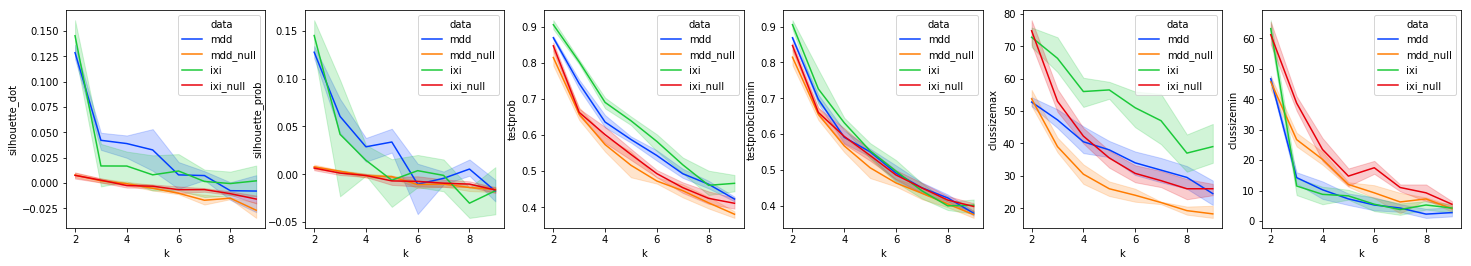

Sc


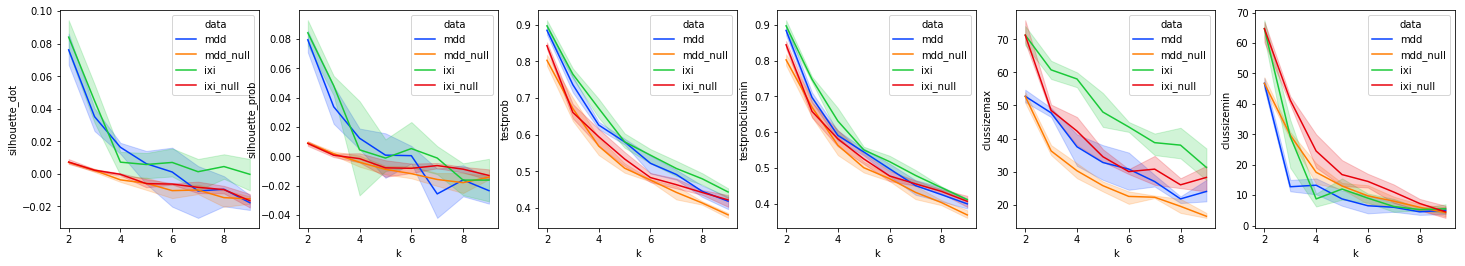

TSc


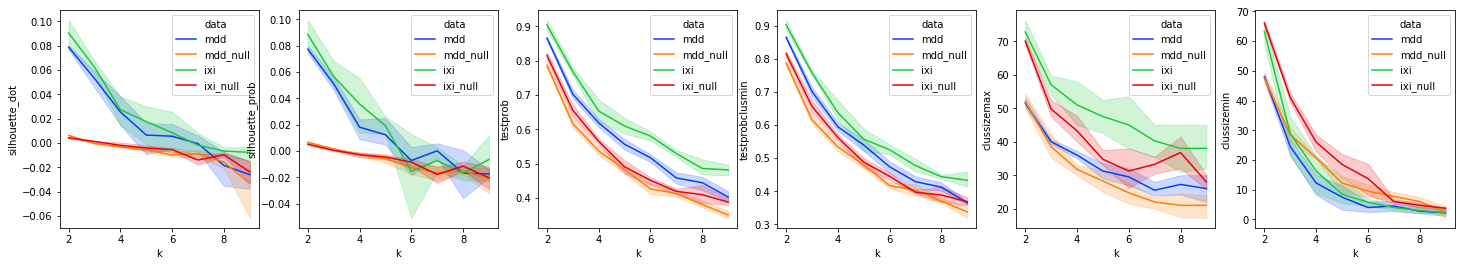

Tct_s


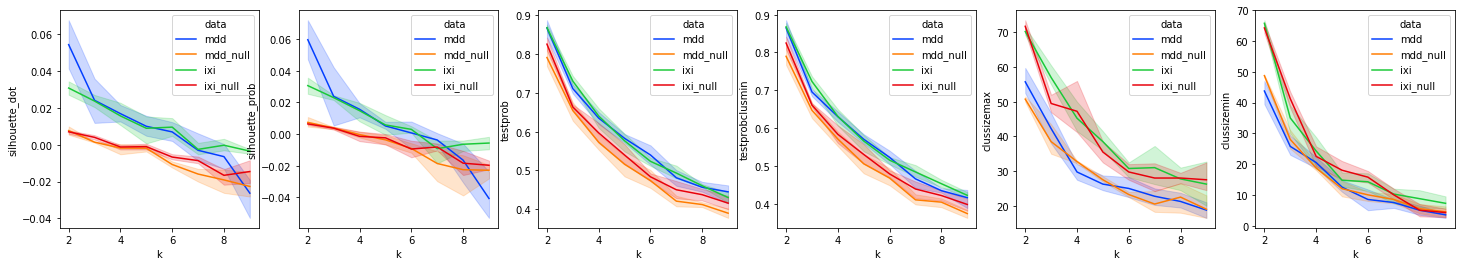

Scs_s


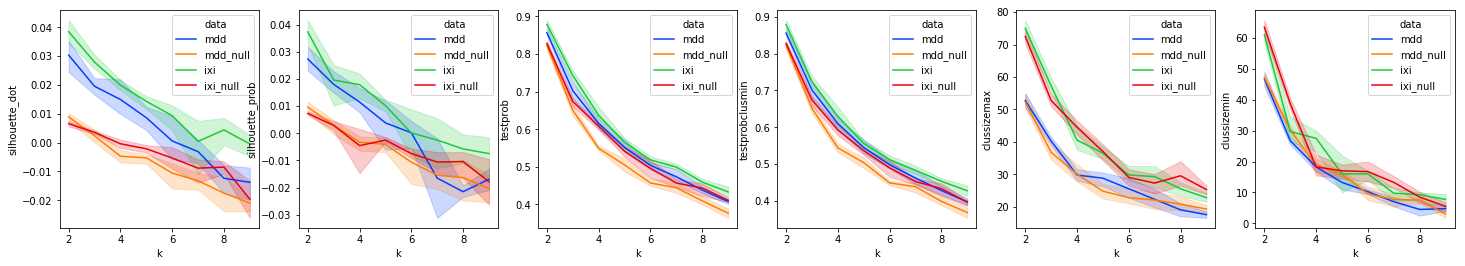

Tct_Scs_s


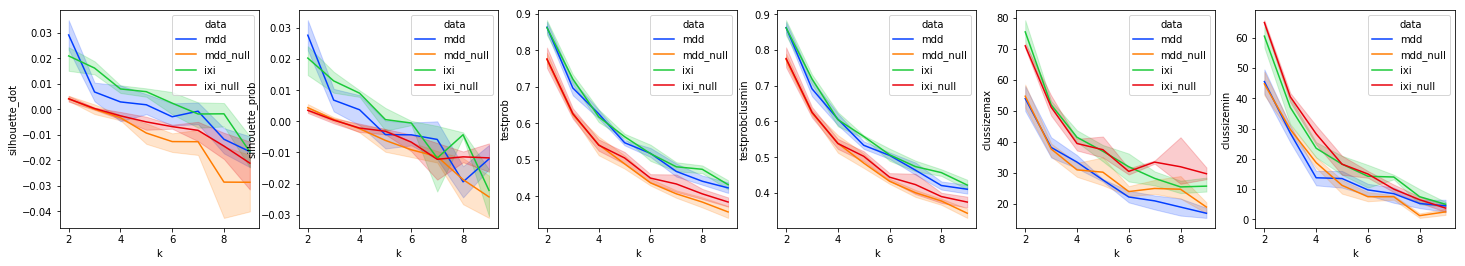

In [44]:
for s in [0,1,2,6,7,8]:
    df2=df3[df3['set']==sets[s]]
    print(sets[s])
    fig = plt.figure(figsize=[25,4])
    dftmp = df2[df2['aggregation']=='hierarchical clustering']
    plt.subplot(1,6,1)
    sns.lineplot(y='silhouette_dot',x='k',hue='data',data=dftmp, palette='bright')
    plt.subplot(1,6,2)
    sns.lineplot(y='silhouette_prob',x='k',hue='data',data=dftmp, palette='bright')
    plt.subplot(1,6,3)
    sns.lineplot(y='testprob',x='k',hue='data',data=dftmp, palette='bright')
    plt.subplot(1,6,4)
    sns.lineplot(y='testprobclusmin',x='k',hue='data',data=dftmp, palette='bright')
    plt.subplot(1,6,5)
    sns.lineplot(y='clussizemax',x='k',hue='data',data=dftmp, palette='bright')
    plt.subplot(1,6,6)
    sns.lineplot(y='clussizemin',x='k',hue='data',data=dftmp, palette='bright')
    plt.show()
    
    
    
# for mdd but not ixi when we take out global CT then 2 clusters is still a big jump above for the silhouette score, although the values overall are still crappy!

In [4]:
# plot the clusters on a tsne
def get_tsne(input_filedir,modstr,s):
    filestr=(input_filedir + sets[0] + modstr + str(0))
    with open(filestr, "rb") as f:
        mod = pickle.load(f)
    Tc = mod.data
    Tc_tsne=TSNE(n_components=2, perplexity=30, early_exaggeration=1, learning_rate=2, n_iter=1000).fit_transform(Tc)
    return Tc_tsne

s=0
Tc_tsne = get_tsne(input_filedir,modstr,s)
Tcn_tsne = get_tsne(input_filedirn,modstrn,s)
Tci_tsne = get_tsne(input_filediri,modstri,s)
Tcin_tsne = get_tsne(input_filedirin,modstrin,s)

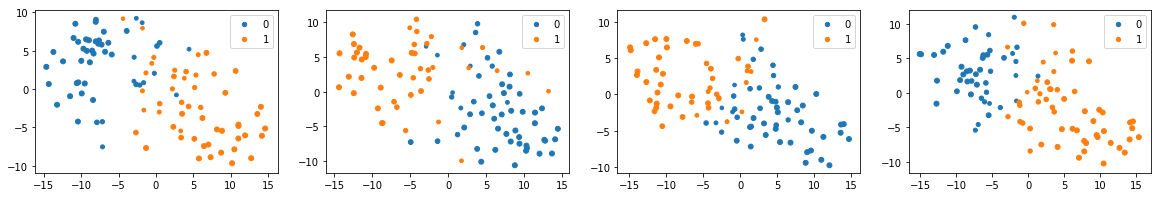

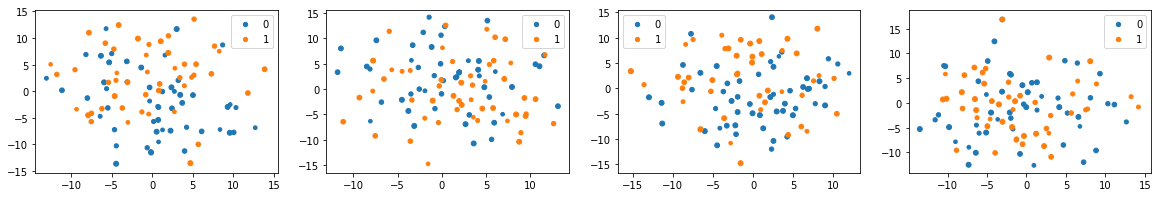

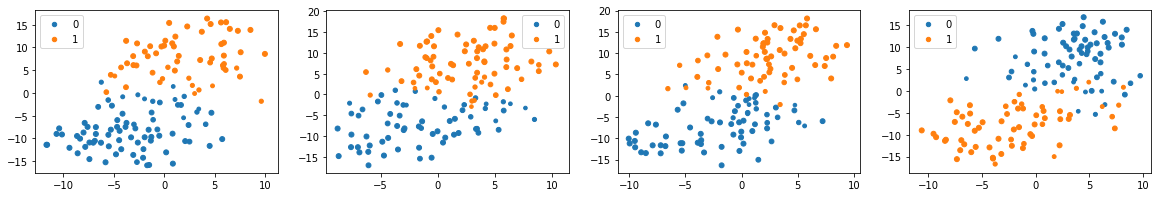

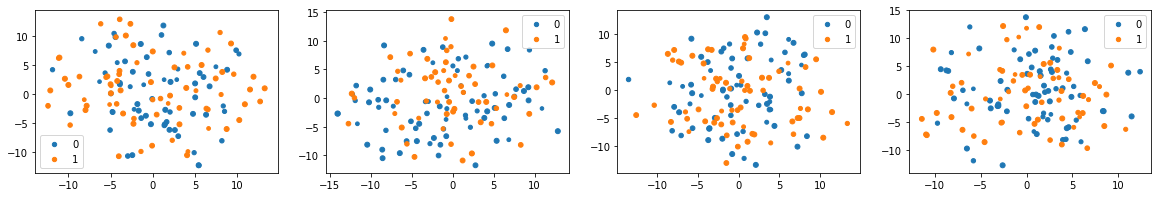

In [199]:
def plot_mf_tsne(input_filedir,modstr,s,k, Tc_tsne):
    filestr=(input_filedir + sets[0] + modstr + str(0))
    with open(filestr, "rb") as f:
        mod = pickle.load(f)
    fig=plt.figure(figsize=[20,3])
    for mf in range(4):
        maintrain = np.where(np.isfinite(mod.cv_assignment[:, mf]))[0]
        maintest = np.where(np.isnan(mod.cv_assignment[:, mf]))[0]
        with open((input_filedir + sets[s] + '_aggr_betas_k' + str(k) + '_mf' + str(mf) + '.pkl'),'rb') as f:
            [X, clustering, assig, allbetas, tmp_testproba, argmaxYdot, argmaxYprob] = pickle.load(f)
        probmax = np.array([tmp_testproba[i,argmaxYprob[i].astype(int)] for i in range(len(argmaxYdot))])
        ax=plt.subplot(1,4,mf+1); colorscatter(Tc_tsne[maintest,:],argmaxYprob,probmax*5, ax, 1)
    plt.show()

s=0
k=0
plot_mf_tsne(input_filedir,modstr,s,k, Tc_tsne)
plot_mf_tsne(input_filedirn,modstrn,s,k, Tcn_tsne)
plot_mf_tsne(input_filediri,modstri,s,k, Tci_tsne)
plot_mf_tsne(input_filedirin,modstrin,s,k, Tcin_tsne)

In [136]:
# now we need to pull the common subs out of the four mainfold solutions

def mainfaggr(s,k,input_filedir, modstr, Tc, minvarexp=1/3):
    
    # load one mod file for dataset sizes and data
    filestr=(input_filedir + sets[s] + modstr + str(0))
    with open(filestr, "rb") as f:
        mod = pickle.load(f)
        
    # preallocate
    assignedwhere = np.full([4,k+2], np.nan)
    assignedwhere2 = np.full([4,k+2], np.nan)
    newlabel = np.zeros(shape=[mod.data.shape[0]])
    allcert = np.zeros(shape=[mod.data.shape[0]])
        
    # collect all betas and compare
    tmp=[]
    for mf in range(4):
        with open((input_filedir + sets[s] + '_aggr_betas_k' + str(k) + '_mf' + str(mf) + '.pkl'),'rb') as f:
            [X, clustering, assig, allbetas, tmp_testproba, argmaxYdot, argmaxYprob] = pickle.load(f)
        tmp.append(allbetas)
    allmses, allcorrs, allvarexp = mainfold_clus_comp(tmp,k)
    allvarexp2=copy.copy(allvarexp)

    
    print('max variance explained:', np.nanmax(allvarexp))
    if np.nanmax(allvarexp)>minvarexp:
        
        fig=plt.figure(figsize=[20,10])
        #plt.subplot(2,2,2)
        #sns.distplot(allvarexp.flatten())
        #plt.title('variance explained between cluster vectors across CV folds')
        
        assignedwhere=varexpmatcher(allvarexp, k, minvarexp)
        trainlabels=np.full([mod.data.shape[0],4],np.nan)
        trainrelab = np.full([mod.data.shape[0],4],0)
        trainl = np.full([mod.data.shape[0]],0)
        trainlcert = np.full([mod.data.shape[0]],0)
        for mf in range(4):
            # get mainfold cluster probabilities
            maintest = np.where(np.isnan(mod.cv_assignment[:, mf]))[0]
            with open((input_filedir + sets[s] + '_aggr_betas_k' + str(k) + '_mf' + str(mf) + '.pkl'),'rb') as f:
                [X, clustering, assig, allbetas, tmp_testproba, argmaxYdot, argmaxYprob] = pickle.load(f)
            assignment_test, likelihood_test, assignment25_test = assigfromproba(tmp_testproba,2)
            maintrain = np.where(np.isfinite(mod.cv_assignment[:, mf]))[0]
            assignment_train, likelihood_train, assignment25_train = prob_from_data(mod.data[maintrain, :], allbetas, 2)

            # plot the mainfold test set assignments
            ax=plt.subplot(3,4,5+mf); colorscatter(Tc[maintest,:], assignment25_test, likelihood_test*7, ax, 1)
            
            # plot the mainfold train set assignments
            ax=plt.subplot(3,4,9+mf); colorscatter(Tc[maintrain,:], assignment25_train, likelihood_train*7, ax, 1)
            
            
            # fill the re-labeled assignments from the test sets into one vector
            for c in range(k+2):
                newlabel[maintest[np.where(assignment25_test==c+1)[0]]]=assignedwhere[mf,c]
                trainrelab[maintrain[np.where(assignment25_train==c+1)[0]],mf]=assignedwhere[mf,c]
            allcert[maintest]=likelihood_test
            
        for i in range(mod.data.shape[0]):
            ccount=np.array([len(np.where(trainrelab[i,:]==c)[0]) for c in range(k+3)])
            maxccount=np.nanmax(ccount)
            if len(np.where(ccount==2)[0])==1:
                trainl[i]=np.where(ccount==2)[0]
                trainlcert[i]=2
            elif maxccount>2:
                trainl[i]=np.where(ccount==maxccount)[0]
                trainlcert[i]=maxccount
            #elif:
            #    print(ccount)
            
        ax=plt.subplot(3,2,2)
        colorscatter(Tc,trainl,trainlcert+1,ax,1)            
            
        # plot all re-labeled test set assignments    
        newlabel[np.isnan(newlabel)]=0
        ax=plt.subplot(3,2,1)
        colorscatter(Tc,newlabel,allcert*7,ax,1)
        plt.show()
        
    else: # this is the case for the null models (at least i haven't seen an exception yet)
        print('variance explained always below threshold')
        fig=plt.figure()
        sns.distplot(allvarexp.flatten())
        plt.title('variance explained between cluster vectors across CV folds')
        plt.show()
        #print(allvarexp)
        
    return assignedwhere, newlabel, allmses, allcorrs, allvarexp2

mdd
max variance explained: 0.5242736120594943
stopped because all are assigned
[[1. 2.]
 [2. 1.]
 [2. 1.]
 [1. 2.]]
[[0 0 2 2]
 [2 2 2 0]
 [1 0 1 1]
 ...
 [2 2 0 2]
 [1 0 2 0]
 [0 1 1 1]]


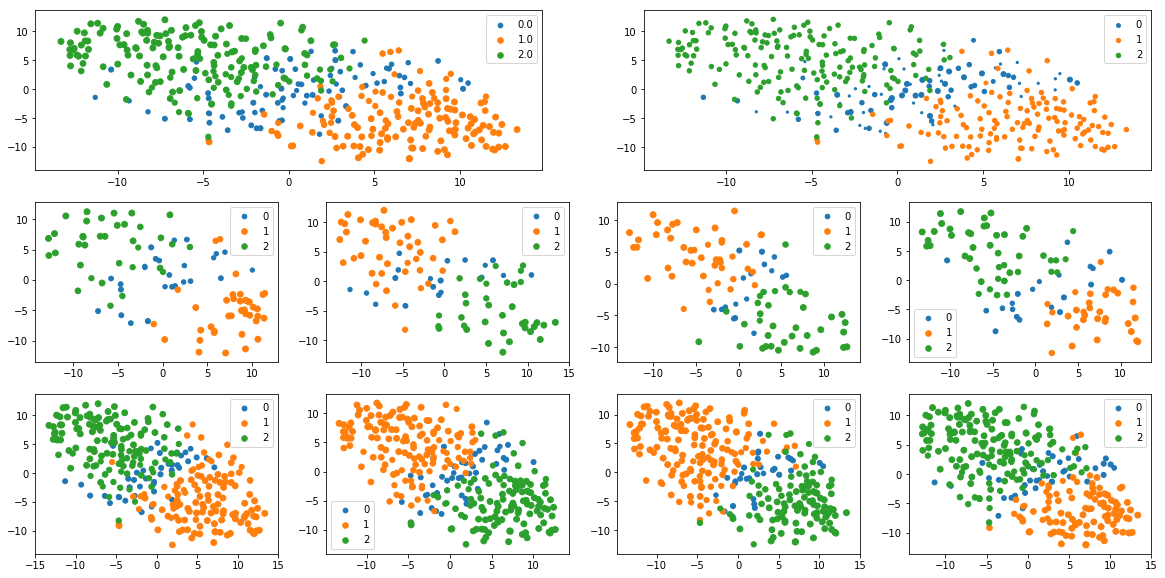

mdd null
max variance explained: -0.42158611561956816
variance explained always below threshold


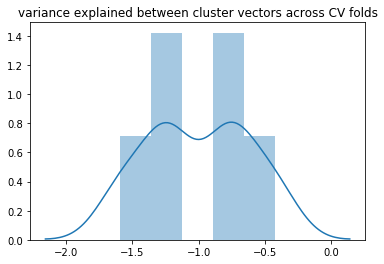

ixi
max variance explained: 0.6198616734469563
stopped because all are assigned
[[1. 2.]
 [1. 2.]
 [1. 2.]
 [2. 1.]]
[[1 1 0 1]
 [2 0 2 2]
 [0 2 2 2]
 ...
 [0 0 2 2]
 [0 1 1 1]
 [0 2 2 2]]


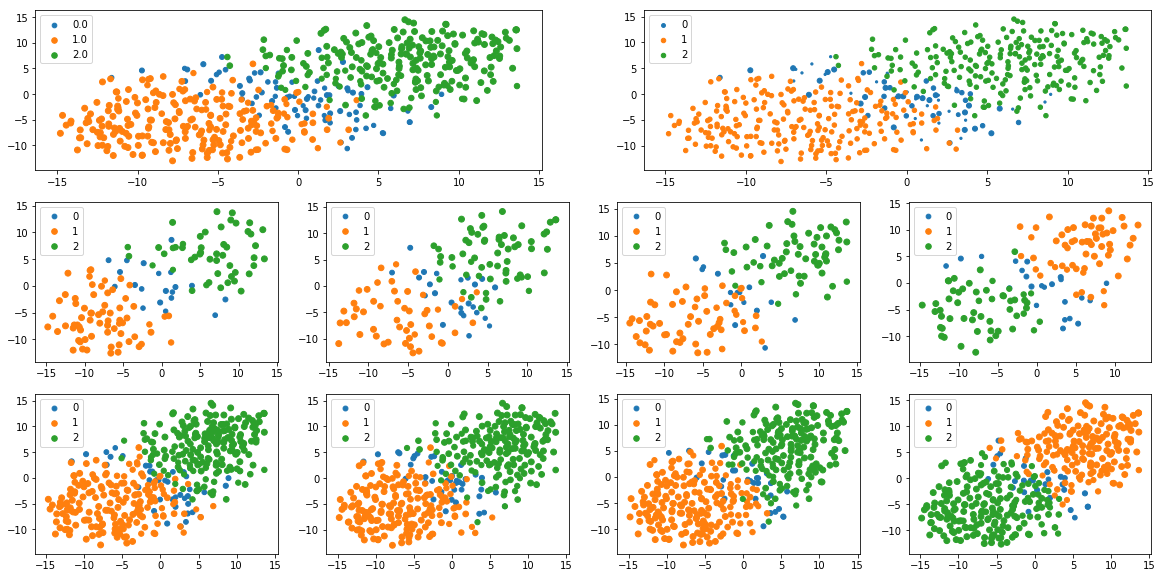

ixi null
max variance explained: -0.7224653065093145
variance explained always below threshold


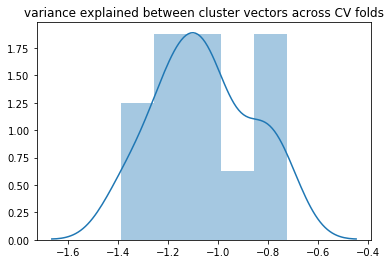

In [137]:
s=0
k=0
print('mdd')
assignedwhere, newlabel_mdd, allmses, allcorrs, allvarexp = mainfaggr(s,k,input_filedir, modstr, Tc_tsne)
print('mdd null')
assignedwhere, newlabel, allmses, allcorrs, allvarexp = mainfaggr(s,k,input_filedirn, modstrn, Tcn_tsne)
print('ixi')
assignedwhere, newlabel_ixi, allmses, allcorrs, allvarexp = mainfaggr(s,k,input_filediri, modstri, Tci_tsne)
print('ixi null')
assignedwhere, newlabel, allmses, allcorrs, allvarexp = mainfaggr(s,k,input_filedirin, modstrin, Tcin_tsne)

In [47]:
# now look at covariate differences for the groups
len(newlabel_ixi)

544

mdd
max variance explained: 0.6590441057453948
stopped because all are assigned
[[1. 4. 3. 2.]
 [4. 1. 3. 2.]
 [1. 4. 3. 2.]
 [4. 1. 3. 2.]]
[[ 3. nan  4.  3.]
 [ 3.  3.  3. nan]
 [ 2. nan  2.  2.]
 ...
 [ 3.  3. nan  3.]
 [ 1.  1.  1. nan]
 [nan  2.  2.  2.]]


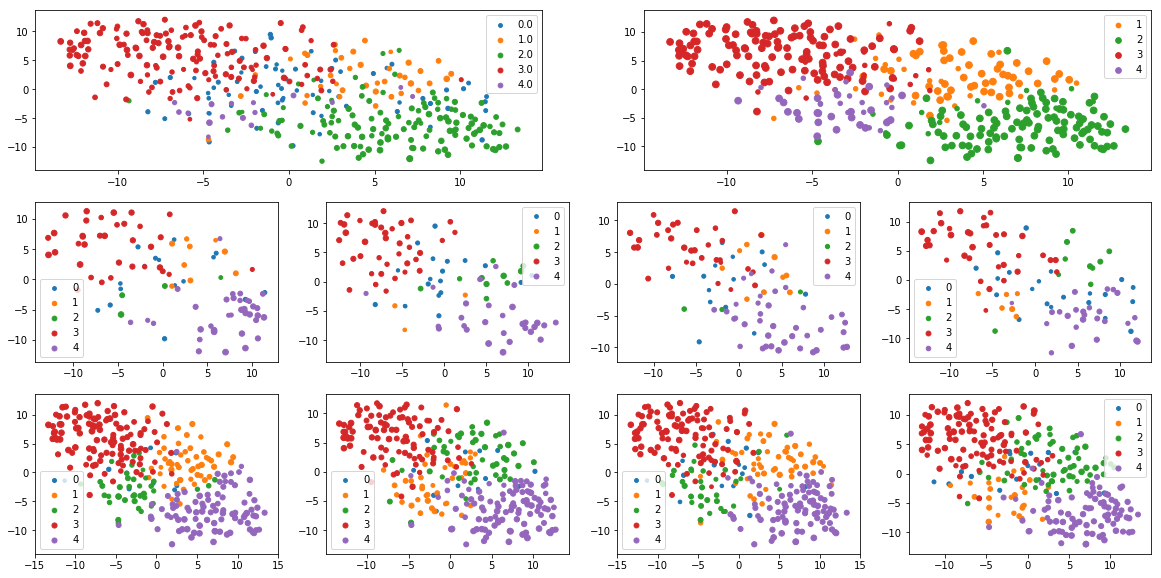

mdd null
max variance explained: -0.09945363033832472
variance explained always below threshold


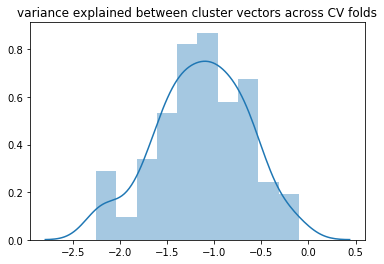

In [111]:
s=0
k=2
print('mdd')
assignedwhere, newlabel, allmses, allcorrs, allvarexp = mainfaggr(s,k,input_filedir, modstr, Tc_tsne)
allvarexp3=copy.copy(allvarexp)
print('mdd null')
assignedwhere, newlabel, allmses, allcorrs, allvarexp = mainfaggr(s,k,input_filedirn, modstrn, Tcn_tsne)

ixi
max variance explained: 0.5562415572346242
stopped because max variance under threshold
[[ 5. nan  4.  1.  3. nan nan]
 [nan nan nan  1.  5. nan nan]
 [nan  2. nan nan nan  1. nan]
 [nan  4.  2.  3.  1. nan nan]]


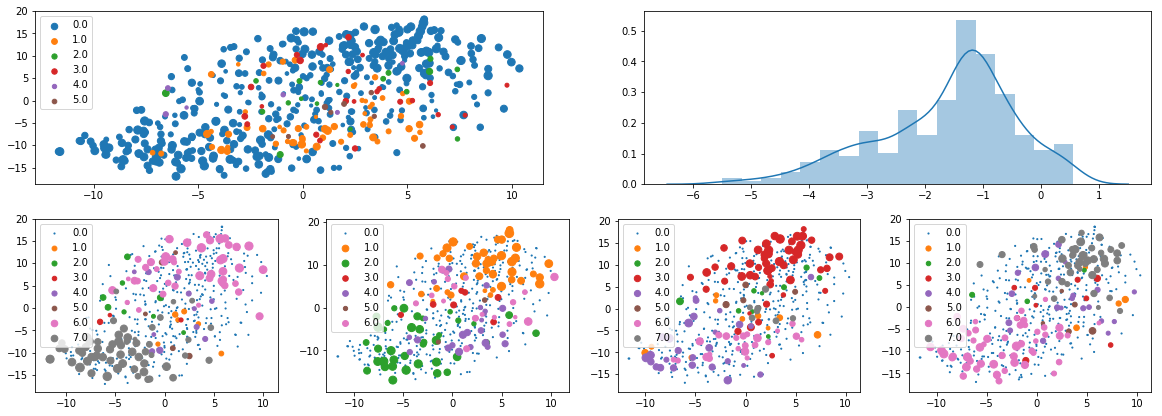

ixi null
max variance explained: 0.15215265842502557
variance explained always below threshold


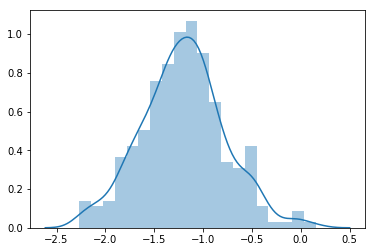

In [510]:
s=0
k=5
print('ixi')
assignedwhere, newlabel, allmses, allcorrs, allvarexp = mainfaggr(s,k,input_filediri, modstri, Tci_tsne)
print('ixi null')
assignedwhere, newlabel, allmses, allcorrs, allvarexp = mainfaggr(s,k,input_filedirin, modstrin, Tcin_tsne)

Tc


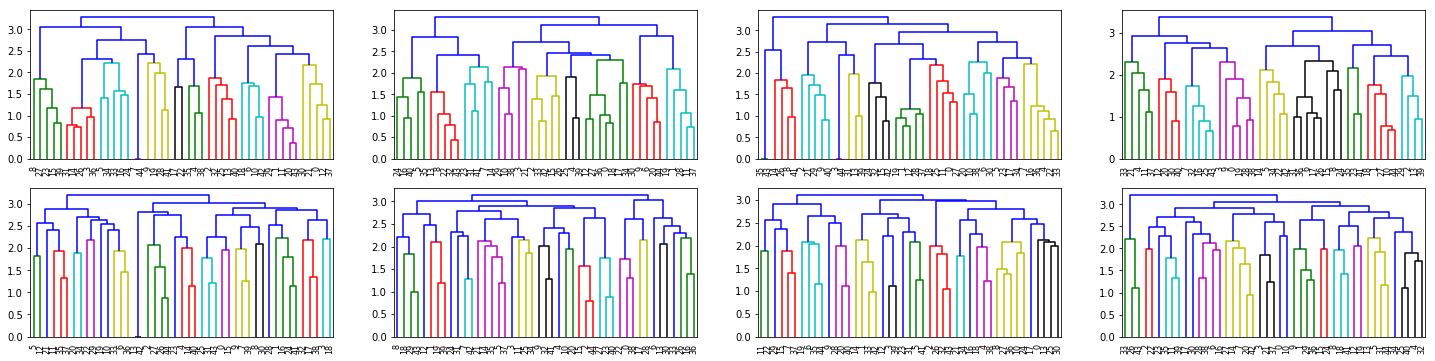

Sc


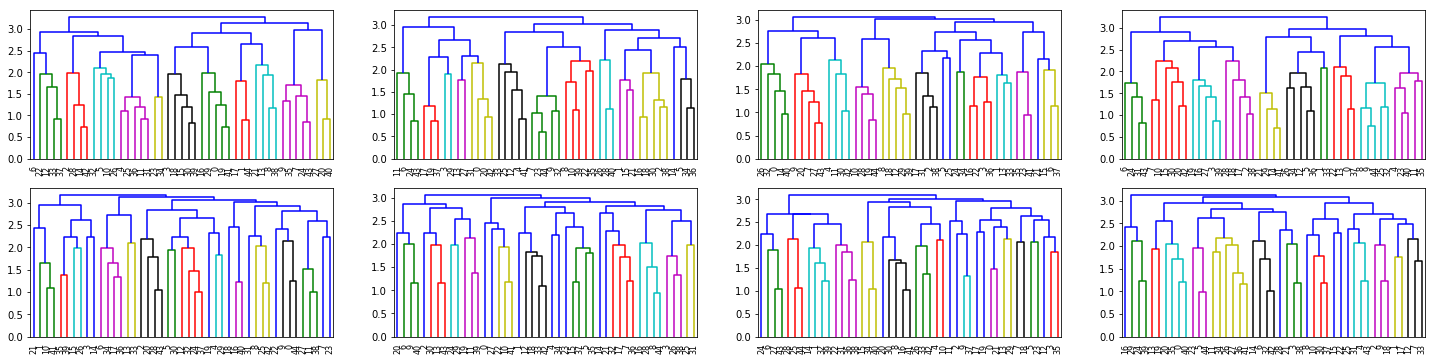

TSc


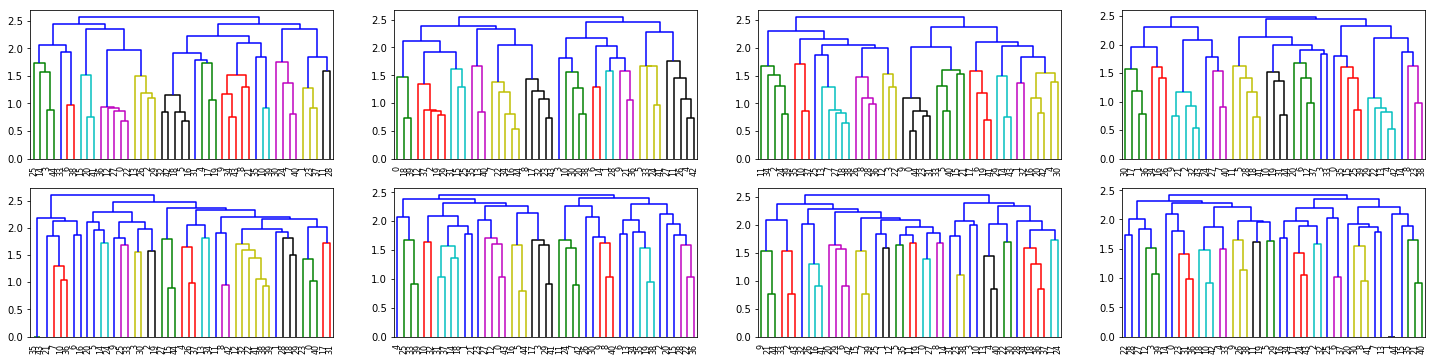

In [153]:
# if i now stick all beta vectors from all k into a hierarchical clustering - how many do i get back?
for s in range(3):
    print(sets[s])
    filestr = (input_filedir + sets[s] + modstr + str(0))
    with open(filestr, "rb") as f:
        mod = pickle.load(f)
        
    fig=plt.figure(figsize=[25,6])
    
    for null in range(2):
        for mf in range(n_cv_folds):
            Xx=np.empty((mod.data.shape[1],0),int)
            for k in range(n_k):
                if null==0:
                    with open((input_filedir + sets[s] + '_aggr_betas_k' + str(k) + '_mf' + str(mf) + '.pkl'),'rb') as f:
                        [X, clustering, assig, allbetas, tmp_testproba, argmaxYdot, argmaxYprob] = pickle.load(f)
                else:
                    with open((input_filedirn + sets[s] + '_aggr_betas_k' + str(k) + '_mf' + str(mf) + '.pkl'),'rb') as f:
                        [X, clustering, assig, allbetas, tmp_testproba, argmaxYdot, argmaxYprob] = pickle.load(f)
                Xx=np.append(X,allbetas,axis=1)

            clustering = AgglomerativeClustering(compute_full_tree=True, distance_threshold=3, n_clusters=None,linkage='complete').fit(Xx.T)
            plt.subplot(2,4,(null*4)+mf+1)
            plot_dendrogram(clustering, p=3)
    plt.show()

Tc


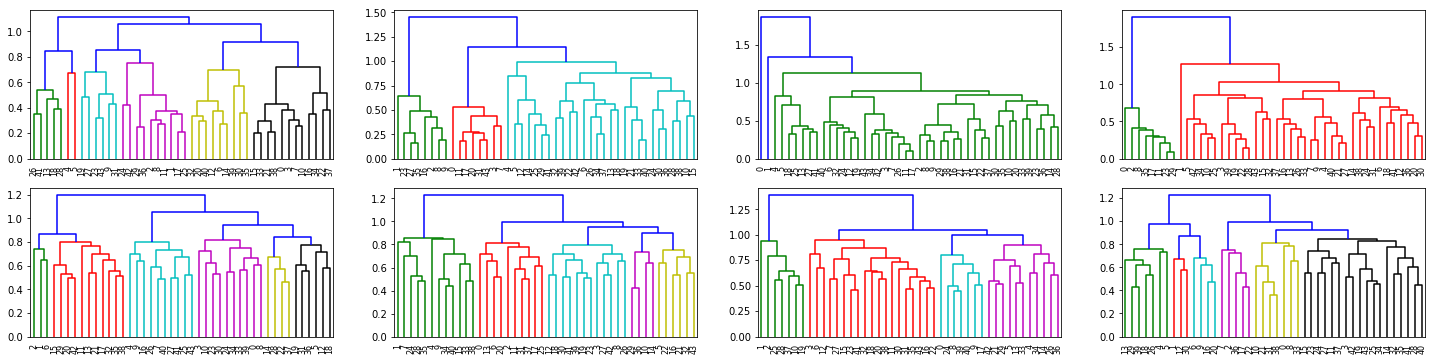

Sc


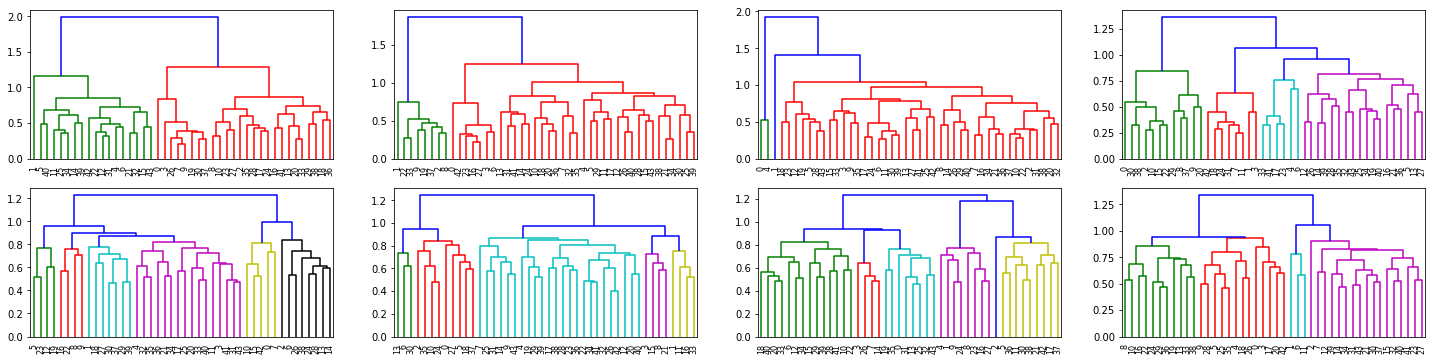

TSc


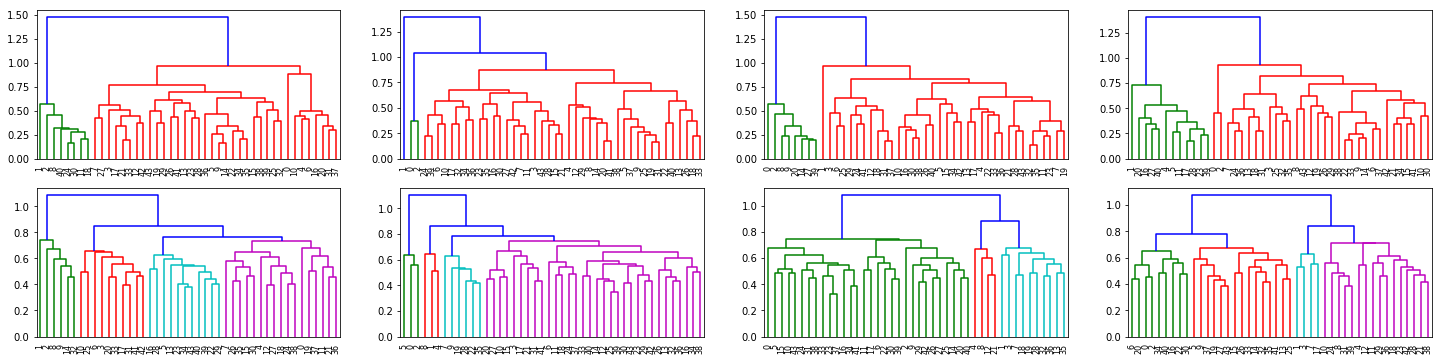

In [154]:
# if i now stick all beta vectors from all k into a hierarchical clustering - how many do i get back?
for s in range(3):
    print(sets[s])
    filestr = (input_filedir + sets[s] + modstr + str(0))
    with open(filestr, "rb") as f:
        mod = pickle.load(f)
        
    fig=plt.figure(figsize=[25,6])
    
    for null in range(2):
        for mf in range(n_cv_folds):
            X=np.empty((mod.data.shape[1],0),int)
            for k in range(n_k):
                if null==0:
                    with open((input_filedir + sets[s] + '_aggr_00_betas_k' + str(k) + '_mf' + str(mf) + '.pkl'),'rb') as f:
                        [aggregated_betas, all_weighted_betas, tmp_testproba, argmaxYtest, argmaxYtest2] = pickle.load(f)
                else:
                    with open((input_filedirn + sets[s] + '_aggr_00_betas_k' + str(k) + '_mf' + str(mf) + '.pkl'),'rb') as f:
                        [aggregated_betas, all_weighted_betas, tmp_testproba, argmaxYtest, argmaxYtest2] = pickle.load(f)
                X=np.append(X,aggregated_betas[1:,:],axis=1)

            clustering = AgglomerativeClustering(compute_full_tree=True, distance_threshold=3, n_clusters=None,linkage='complete').fit(X.T)
            plt.subplot(2,4,(null*4)+mf+1)
            plot_dendrogram(clustering, p=3)
    plt.show()

In [155]:
# how big are the clusters?
print(clussize_dot_lvl3in.shape)
print(clussize_prob_lvl3in.shape)

(12, 4, 8, 10)
(12, 4, 8, 10)


In [168]:
for s in rangeprint(clussize_dot_lvl3[0,:,0,:])

[[47. 52. nan nan nan nan nan nan nan nan]
 [55. 45. nan nan nan nan nan nan nan nan]
 [47. 53. nan nan nan nan nan nan nan nan]
 [51. 48. nan nan nan nan nan nan nan nan]]


In [171]:
np.nanmax(clussize_dot_lvl3[0,1,0,:])

55.0